#### Data: The data we will be working with is the Maryland crashes dataset taken from https://opendata.maryland.gov/. This dataset consists of crashes that occured in the Maryland state from January 2015 to September 2021. This dataset has three sub-datasets which are:

File-1: Maryland Statewide Vehicle Crashes:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

File-2: Person Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf

File-3: Vehicle Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
import math
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

<div class = "aler alert-info">The three datasets crashes, persons and vehicles are cleaned and understood before importing it here.</div>

### EDA

In [3]:
crashes = pd.read_csv('Downloads/Maryland_Statewide_Vehicle_Crashes.csv',low_memory=False)
vehicles = pd.read_csv('Downloads/vehicles_refined.csv',low_memory=False)
persons = pd.read_csv('Downloads/persons_refined.csv',low_memory=False)

In [4]:
crashes.shape

(715561, 56)

In [5]:
persons.shape

(1664889, 32)

In [6]:
vehicles.shape

(1162313, 22)

In [7]:
crashes.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_DESC', 'LANE_CODE', 'RD_COND_DESC',
       'RD_COND_CODE', 'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC',
       'FIX_OBJ_CODE', 'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC',
       'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC',
       'SIGNAL_FLAG', 'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE',
       'HARM_EVENT_DESC1', 'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2',
       'HARM_EVENT_CODE2', 'RTE_NO', 'ROUTE_TYPE_CODE', 'RTE_SUFFIX',
       'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'LOGMILE_DIR_FLAG',
       'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC', 'FEET_MILES_FLAG',
       'DISTANCE_DIR_FLAG', 'REFERENCE_NO', 'REFERENCE_TYPE_CODE',
       'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME', 'LATITUDE', 'LONGITUDE',
       'L

In [8]:
vehicles.columns

Index(['Unnamed: 0', 'HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC',
       'MOVEMENT_DESC', 'VIN_NO', 'REPORT_NO', 'VEH_YEAR', 'VEH_MAKE',
       'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC', 'GOING_DIRECTION_DESC',
       'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC',
       'PARKED_FLAG_DESC', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'YEAR', 'Quarter'],
      dtype='object')

In [9]:
persons.columns

Index(['Unnamed: 0', 'SEX_DESC', 'SEX_CODE', 'CONDITION_DESC',
       'CONDITION_CODE', 'INJ_SEVER_DESC', 'INJ_SEVER_CODE', 'REPORT_NO',
       'PERSON_TYPE_DESC', 'PERSON_TYPE', 'ALCOHOL_TEST_DESC',
       'ALCOHOL_TEST_CODE', 'DRUG_TEST_DESC', 'DRUG_TEST_CODE',
       'FAULT_FLAG_DESC', 'FAULT_FLAG', 'EQUIP_PROB_DESC', 'EQUIP_PROB_CODE',
       'SAF_EQUIP_DESC', 'SAF_EQUIP_CODE', 'EJECT_DESC', 'EJECT_CODE',
       'DATE_OF_BIRTH', 'PERSON_ID', 'LICENSE_STATE_CODE', 'CLASS',
       'CDL_FLAG_DESC', 'CDL_FLAG', 'VEHICLE_ID', 'AIRBAG_DEPLOYED', 'YEAR',
       'Quarter'],
      dtype='object')

In [10]:
persons = persons.drop('Unnamed: 0', axis = 1)

### Merging the three datasets on the three common columns

In [11]:
vehicles.columns

Index(['Unnamed: 0', 'HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC',
       'MOVEMENT_DESC', 'VIN_NO', 'REPORT_NO', 'VEH_YEAR', 'VEH_MAKE',
       'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC', 'GOING_DIRECTION_DESC',
       'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC',
       'PARKED_FLAG_DESC', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'YEAR', 'Quarter'],
      dtype='object')

In [12]:
#Choose column names based on your needs.
crashes_df=crashes[['ACC_DATE', 'ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE', 'LONGITUDE','SURF_COND_DESC','MAINROAD_NAME', 'RD_COND_DESC',
       'RD_DIV_DESC']]
persons_df=persons[['REPORT_NO','SEX_DESC','LICENSE_STATE_CODE','DATE_OF_BIRTH','INJ_SEVER_DESC','CONDITION_DESC']]
vehicles_df=vehicles[['VEH_YEAR', 'VEH_MAKE','REPORT_NO','SPEED_LIMIT','YEAR','Quarter']]

In [13]:
# merging crashes and persons
final_data = pd.merge(pd.merge(crashes_df,persons_df,on="REPORT_NO"),vehicles_df,on="REPORT_NO")
final_data.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SURF_COND_DESC,MAINROAD_NAME,RD_COND_DESC,...,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,INJ_SEVER_DESC,CONDITION_DESC,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,YEAR,Quarter
0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,...,NaN,NaN,NaN,No Injury,Not Applicable,2019,TOY,5,2020,Q2
1,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,CHARLES STREET,No Defects,...,Male,MD,19750621,Possible Incapacitating Injury,Apparently Normal,2005,HYUNDAI,45,2020,Q2
2,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,CHARLES STREET,No Defects,...,Male,MD,19750621,Possible Incapacitating Injury,Apparently Normal,2014,SUBA,30,2020,Q2
3,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,CHARLES STREET,No Defects,...,Male,MD,19750621,Possible Incapacitating Injury,Apparently Normal,2015,VOLK,30,2020,Q2
4,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,CHARLES STREET,No Defects,...,NaN,NaN,NaN,No Injury,Not Applicable,2005,HYUNDAI,45,2020,Q2


In [14]:
final_data.shape

(2950459, 21)

In [15]:
final_data.columns

Index(['ACC_DATE', 'ACC_TIME', 'WEATHER_DESC', 'REPORT_NO', 'COUNTY_DESC',
       'LATITUDE', 'LONGITUDE', 'SURF_COND_DESC', 'MAINROAD_NAME',
       'RD_COND_DESC', 'RD_DIV_DESC', 'SEX_DESC', 'LICENSE_STATE_CODE',
       'DATE_OF_BIRTH', 'INJ_SEVER_DESC', 'CONDITION_DESC', 'VEH_YEAR',
       'VEH_MAKE', 'SPEED_LIMIT', 'YEAR', 'Quarter'],
      dtype='object')

In [16]:
final_data.sample(10)

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SURF_COND_DESC,MAINROAD_NAME,RD_COND_DESC,...,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,INJ_SEVER_DESC,CONDITION_DESC,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,YEAR,Quarter
2779794,20210311,15:45:00,NaN,MCP2001001H,Montgomery,39.138286,-77.153586,Dry,SHADY GROVE RD,No Defects,...,Male,MD,19491210,Non-incapacitating Injury,Apparently Normal,2018,FORD,45,2021,Q1
2540996,20180830,10:00:00,Not Applicable,ADJ8380021,Baltimore City,39.293462,-76.591528,Not Applicable,LAMLEY,No Defects,...,NaN,NaN,NaN,No Injury,Unknown,2001,CHEVY,5,2018,Q3
2215728,20180415,12:57:00,Raining,AC1637009S,Anne Arundel,39.193565,-76.632448,Wet,NO NAME,No Defects,...,Male,MD,19520531,No Injury,Apparently Normal,2011,JAGUAR,55,2018,Q2
2344864,20161017,15:06:00,Clear,BS0512000B,Frederick,39.432540,-77.404141,Dry,N MARKET ST,No Defects,...,Female,NaN,19870416,No Injury,NaN,2013,HONDA,25,2016,Q4
1891781,20191215,21:30:00,Not Applicable,ADG6400015,Baltimore City,39.348432,-76.683120,Not Applicable,5200 CUTHBERT AVE,No Defects,...,Male,NaN,19810304,No Injury,NaN,2015,PIECE,25,2019,Q4
398531,20160628,11:11:00,NaN,MCP2039001R,Montgomery,39.181807,-77.251770,Dry,NORBECK RD,No Defects,...,Male,MD,11-AUG-61,No Injury,Apparently Normal,2006,FORD,45,2016,Q2
1650607,20160411,21:31:00,Not Applicable,CC02090011,Prince George's,38.954931,-76.945525,Dry,JEFFERSON ST,No Defects,...,Female,MD,26-JUL-54,Possible Incapacitating Injury,Apparently Normal,2001,DODGE,25,2016,Q2
1923237,20191018,15:03:00,NaN,AC22820013,Anne Arundel,39.150375,-76.707567,Dry,NO NAME,No Defects,...,Female,MD,19900202,No Injury,Apparently Normal,2015,MINI,55,2019,Q4
905493,20180319,08:42:00,Clear,MTA02750019,Baltimore City,39.362266,-76.699601,Dry,PARK HEIGHTS AVE,No Defects,...,Female,NaN,20010721,Non-incapacitating Injury,NaN,2004,NEWFLYER,25,2018,Q1
376206,20180912,16:24:00,Raining,MSP6730005Q,Montgomery,39.001269,-77.156702,Wet,CAPITAL BELTWAY,No Defects,...,Female,MD,20010923,No Injury,Apparently Normal,2007,VOLVO,55,2018,Q3


In [17]:
final_data.describe()

,ACC_DATE,LATITUDE,LONGITUDE,VEH_YEAR,SPEED_LIMIT,YEAR
count,2.950459e+06,2.950459e+06,2.950459e+06,2.950459e+06,2.950459e+06,2.950459e+06
mean,2.017782e+07,3.913909e+01,-7.674458e+01,2.010270e+03,3.602871e+01,2.017715e+03
std,1.807563e+04,3.028203e-01,4.446217e-01,5.225548e+00,1.525455e+01,1.811540e+00
min,2.015010e+07,3.700000e+01,-7.999610e+01,2.000000e+03,0.000000e+00,2.015000e+03
25%,2.016092e+07,3.898114e+01,-7.694194e+01,2.006000e+03,2.500000e+01,2.016000e+03
50%,2.018032e+07,3.920242e+01,-7.671798e+01,2.011000e+03,3.500000e+01,2.018000e+03
75%,2.019091e+07,3.933824e+01,-7.658360e+01,2.015000e+03,5.000000e+01,2.019000e+03
max,2.021063e+07,3.999480e+01,-7.500000e+01,2.021000e+03,7.500000e+01,2.021000e+03


### Adding columns like Age,month, hour, dayOfWeek etc for future purpose 

In [18]:
# Using REPORT_NO, removing duplicates that aren't needed.
final_data=final_data.drop_duplicates(subset="REPORT_NO",keep='first')

#final_data['DATE_OF_YEAR']=pd.to_datetime(final_data['DATE_OF_BIRTH']).dt.year
final_data['DATE_OF_BIRTH']=pd.to_datetime(final_data['DATE_OF_BIRTH'], errors='coerce')
final_data['year'] = final_data['DATE_OF_BIRTH'].dt.year

# Calculating the age of a person and storing it in a new variable (column)
# This dataset is for the year 2020, and We calculated it using that year.
final_data['AGE']=final_data['YEAR']-final_data['year']

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

#Storing accident date into correect format
final_data['accident_date']=pd.to_datetime(final_data['ACC_DATE'],format='%Y%m%d')

# month
final_data['month'] = final_data['accident_date'].dt.month_name()

# days of the week
final_data['dayOfWeek'] = final_data['accident_date'].dt.dayofweek
final_data['dayOfWeek'] = final_data['dayOfWeek'].apply(lambda x: days[x])

##Storing accident date time into correct format
final_data['accident_datetime']=pd.to_datetime(final_data['accident_date'].astype(str)+' '+final_data['ACC_TIME'].astype(str))

#Hour
final_data['Hour'] = final_data['accident_datetime'].dt.hour

#shift of day
final_data['Hour'] = final_data['Hour'].astype(str).astype(int)
final_data['accident_shift'] = np.where((final_data['Hour'] >= 6) & (final_data['Hour']<11), 'morning',
                        np.where((final_data['Hour'] >= 11) & (final_data['Hour']<15), 'noon',
                               np.where((final_data['Hour'] >= 15) & (final_data['Hour']<18),'afternoon','evening')))
#seasons
final_data['season'] = (final_data['accident_date'].dt.month%12 + 3)//3
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}
final_data['season_name'] = final_data['season'].map(seasons)
del final_data['season']
del final_data['ACC_DATE']

In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676884 entries, 0 to 2950457
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ACC_TIME            676884 non-null  object        
 1   WEATHER_DESC        391248 non-null  object        
 2   REPORT_NO           676884 non-null  object        
 3   COUNTY_DESC         676877 non-null  object        
 4   LATITUDE            676884 non-null  float64       
 5   LONGITUDE           676884 non-null  float64       
 6   SURF_COND_DESC      609162 non-null  object        
 7   MAINROAD_NAME       611122 non-null  object        
 8   RD_COND_DESC        611129 non-null  object        
 9   RD_DIV_DESC         607377 non-null  object        
 10  SEX_DESC            603965 non-null  object        
 11  LICENSE_STATE_CODE  512236 non-null  object        
 12  DATE_OF_BIRTH       602394 non-null  datetime64[ns]
 13  INJ_SEVER_DESC      676884 n

In [20]:
#cleaning age column
final_data.loc[final_data['AGE'] < 16, 'AGE'] = final_data['AGE'].mean()
final_data.loc[final_data['AGE'] > 80, 'AGE'] = final_data['AGE'].mean()
final_data['AGE'] = final_data['AGE'].fillna(final_data['AGE'].mean())

### Correlation map of different columns specified 

<AxesSubplot:>

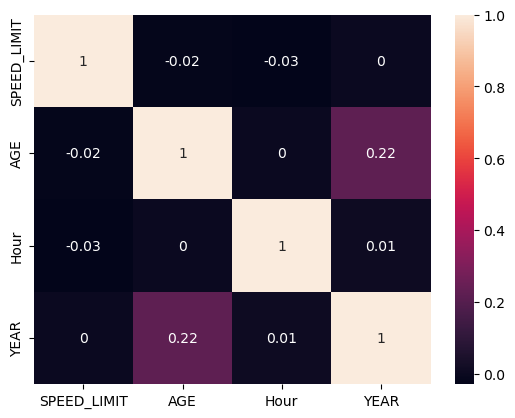

In [21]:
# let's look at the correlation among columns
correlation_matrix = final_data[['SPEED_LIMIT','AGE','Hour','VEH_MAKE','YEAR']].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Findings 

In [22]:
final_data['year'].max()

2071.0

#### Countywise 

In [23]:
#Most accident occuring county
df_county = final_data['COUNTY_DESC'].value_counts()
df=df_county.head(1)
print("{} with the {} counts is the county with the most crashes".format(df.index[0],df[0]))

Baltimore with the 123887 counts is the county with the most crashes


In [24]:
#top 3 accident occuring county
df_county.head(3)

Baltimore          123887
Baltimore City     117595
Prince George's    110923
Name: COUNTY_DESC, dtype: int64

#### Crashes with respect to Mainroads

In [25]:
#MAin road with highest accidents
df_main_road = final_data['MAINROAD_NAME'].value_counts()
df=df_main_road.head(1)
print("{} with the {} counts is the Main Road with the most crashes".format(df.index[0],df[0]))

CAPITAL BELTWAY with the 17825 counts is the Main Road with the most crashes


In [26]:
#top 3 accident occuring Main road
df_main_road.head(3)

CAPITAL BELTWAY    17825
NO NAME            15444
BALTO BELTWAY      13793
Name: MAINROAD_NAME, dtype: int64

#### Crashes with respect to age 

In [27]:
age = final_data['AGE'].max()
print("The maximum age of person involved in accident is",age)

The maximum age of person involved in accident is 80.0


In [28]:
min_age = final_data['AGE'].min()
print("The minimum age of person involved in accident is",min_age)

The minimum age of person involved in accident is 16.0


###  County with maximum number of crashes

<AxesSubplot:xlabel='COUNTY_DESC', ylabel='Count'>

<Figure size 1000x500 with 0 Axes>

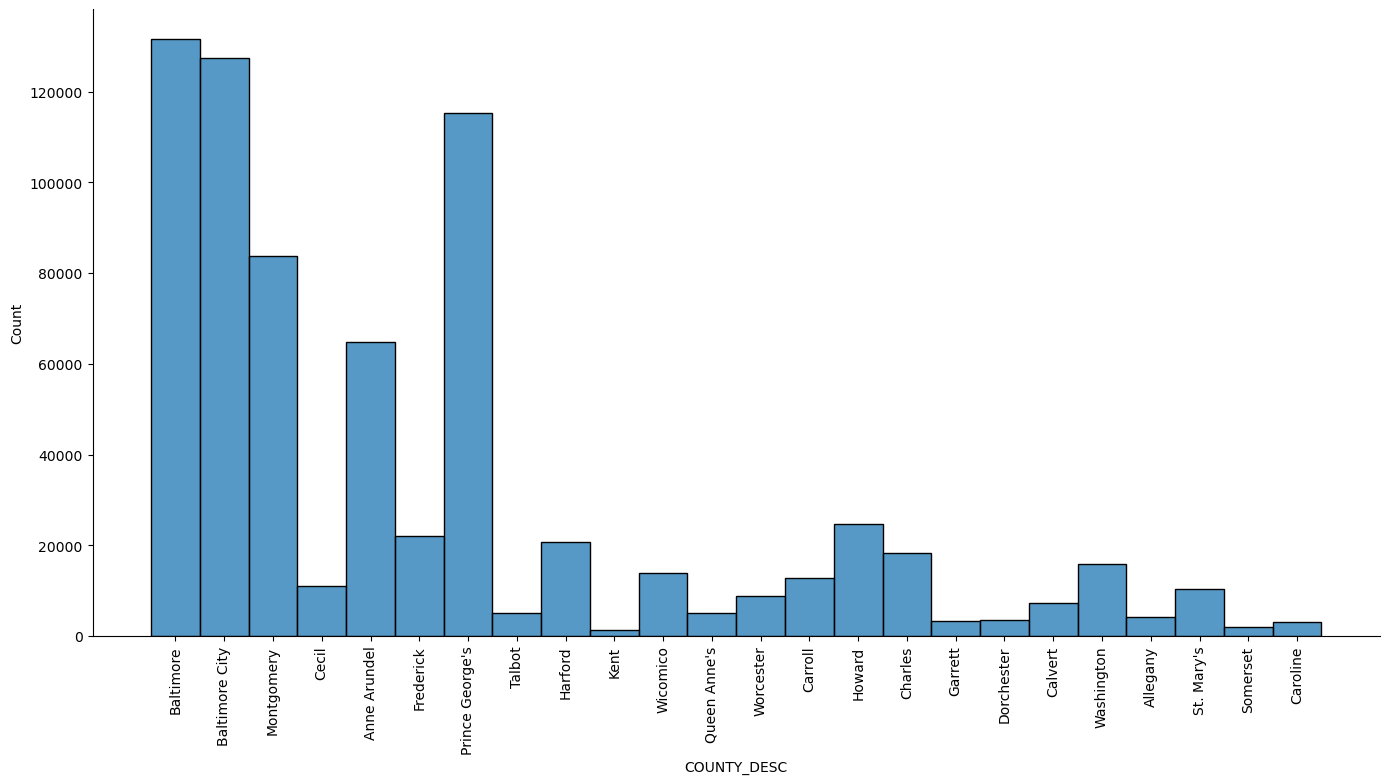

In [29]:
plt.figure(figsize=(10,5))
county_plot = sns.displot(data = crashes, x = 'COUNTY_DESC', kind = 'hist', height = 7, aspect = 2)
county_plot.set_xticklabels(rotation = 90)
county_plot.ax

 <div class ="alert alert-info"> Baltimore county has the most number of crashes recorded.</div>


### Highest accidents recorded among county in different years

In [30]:
#grouping data in accordance to year and county name 
df_crashes_analysis = final_data.groupby(["YEAR",'COUNTY_DESC']).agg(accident_occured=('REPORT_NO','count'))\
            .reset_index().sort_values(by=['accident_occured'],ascending=False).reset_index(drop=True)
#ranking data as 1 if it has highest accidents recorded
df_crashes_analysis['rank'] = df_crashes_analysis.groupby('YEAR')['accident_occured']\
                        .rank(method='dense',ascending=False)

df_crashes_analysis.sort_values(by=['accident_occured'],ascending=False,inplace=True)


In [31]:
df_crashes_analysis = df_crashes_analysis[df_crashes_analysis['rank']==1.0]

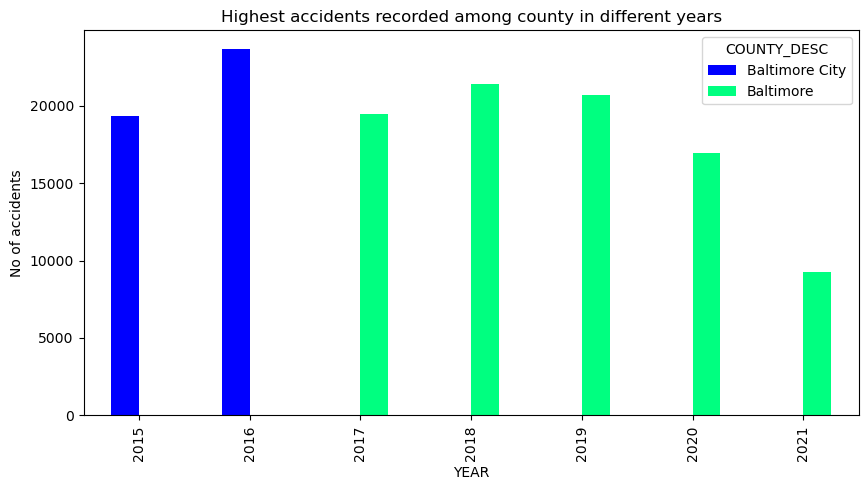

In [32]:
#plotting highest accidents recorded among counties in different year
df_plot = df_crashes_analysis.pivot(index=["YEAR"], columns="COUNTY_DESC", values="accident_occured").reset_index()
df_plot.plot(x="YEAR", y=['Baltimore City','Baltimore'], kind="bar",figsize=(10,5),title = "Highest accidents recorded among county in different years",colormap = 'winter')
plt.ylabel("No of accidents")
plt.show();

### Crashes recorded variation through the years 

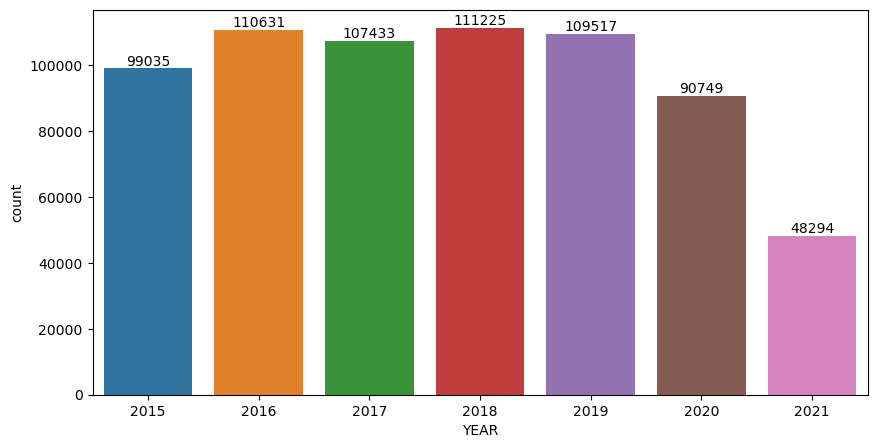

In [33]:
#plotting accident recorded on different years
plt.figure(figsize=(10,5))
ax = sns.countplot(data= final_data, x='YEAR')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<div class = "alert alert-info">Number of crashes recorded seems to be stable uptill 2019 and drops in the year 2020. This could possibly because of the travel restrictions and lockdowns during the pandemic. The 2021 data consists of the data collected only in the first 2 quarters. Also it seems like in all the years except for the year 2020, most crashes occur in the 4th quarter.</div>

### Crashes recorded on different quarters of years in different year 

<Figure size 1000x500 with 0 Axes>

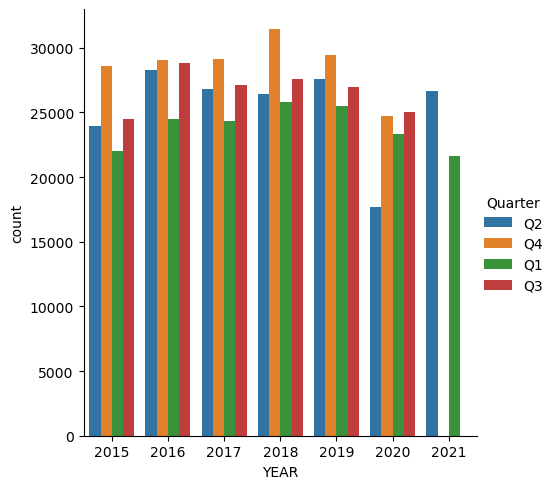

In [34]:
plt.figure(figsize=(10,5))
county_plot = sns.catplot(data = final_data, x = 'YEAR', kind = 'count', hue ='Quarter')
plt.show()

<div class = 'alert alert-info'>Above plot concludes, most of the accidents occured on fourth quarter of the year until 2020 and there are no accidents on 2021 on respective quarter.<div>

### Crashes recorded on different month of year 

In [35]:
months=final_data['accident_datetime'].dt.month_name().value_counts()
months=months.sort_values(ascending=False)

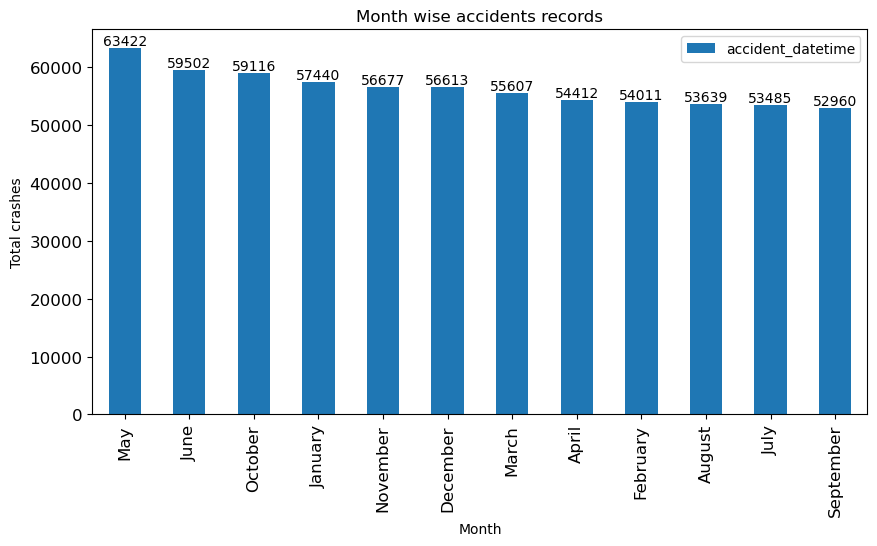

In [36]:
fig, ax = plt.subplots()
ax = months.plot(kind='bar',  figsize=(10,5), legend=True, fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Month', ylabel='Total crashes', title='Month wise accidents records')
ax.legend()

<div class = "alert alert-info">
    
- From the above visualization we can notice that, the more number of accidents taken place in May.
    
- The curve gradually falls after the spring and in summer the count is less.
    
- We can analyse that in spring there are more accidents took place due to the rain, ice and fog.</div>

### Accidents occured on day of week 

In [37]:
days=final_data['accident_date'].dt.day_name().value_counts()

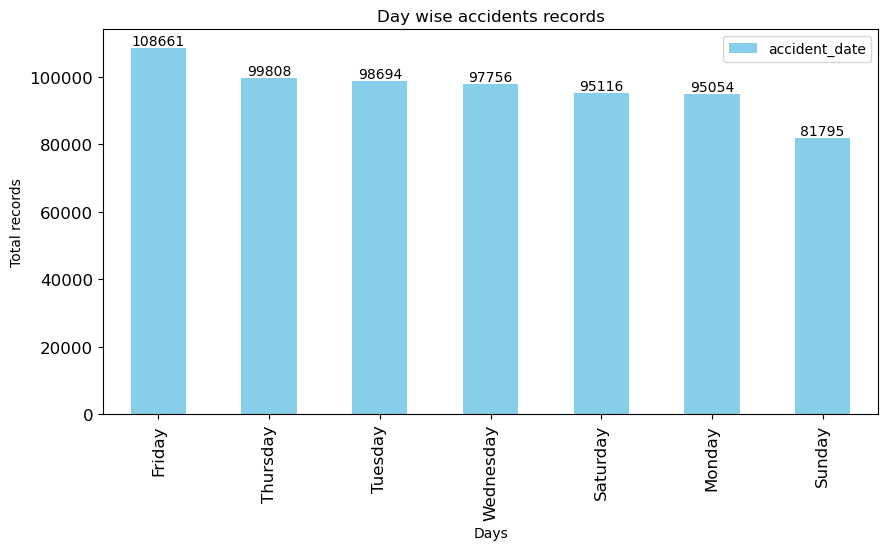

In [38]:
fig, ax = plt.subplots()
ax = days.plot(kind='bar',  figsize=(10,5), legend=True, fontsize=12, color = "skyblue")
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Days', ylabel='Total records', title='Day wise accidents records')
ax.legend()

<div class ="alert alert-info">
    
- From above figure we can analyse the count is more during Thursday's and Friday's.
    
- We can notice during the working days there is huge traffic and chances of having crashes are also high.</div>

### Accidents occured on hour of the day

In [39]:
#calculating no of crashes on different hours
hours=final_data['accident_datetime'].dt.hour.value_counts()
hours=hours.sort_values(ascending=False)

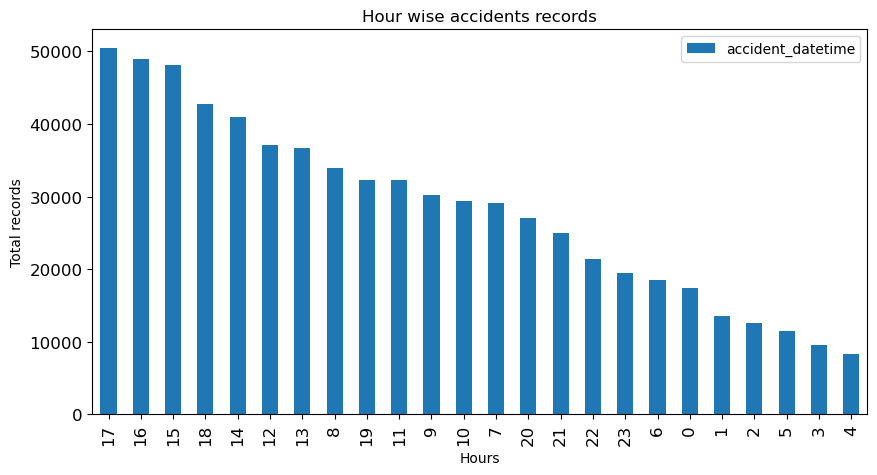

In [40]:
fig, ax = plt.subplots()
ax = hours.plot(kind='bar',  figsize=(10,5), legend=True, fontsize=12)
#for container in ax.containers:
    #ax.bar_label(container)
ax.set(xlabel='Hours', ylabel='Total records', title='Hour wise accidents records')
ax.legend()

<div class = "alert alert-info">
    
- The above visualization we can notice that, the more number of accidents happens in between the hours from 15 to 20.
    
- We can analyse that the count of accidents is more at night due to the less visibility the distance is hard to judge at night times.
    
    <div>

### Analyzing crashes on any time of day when there is high no accidents 

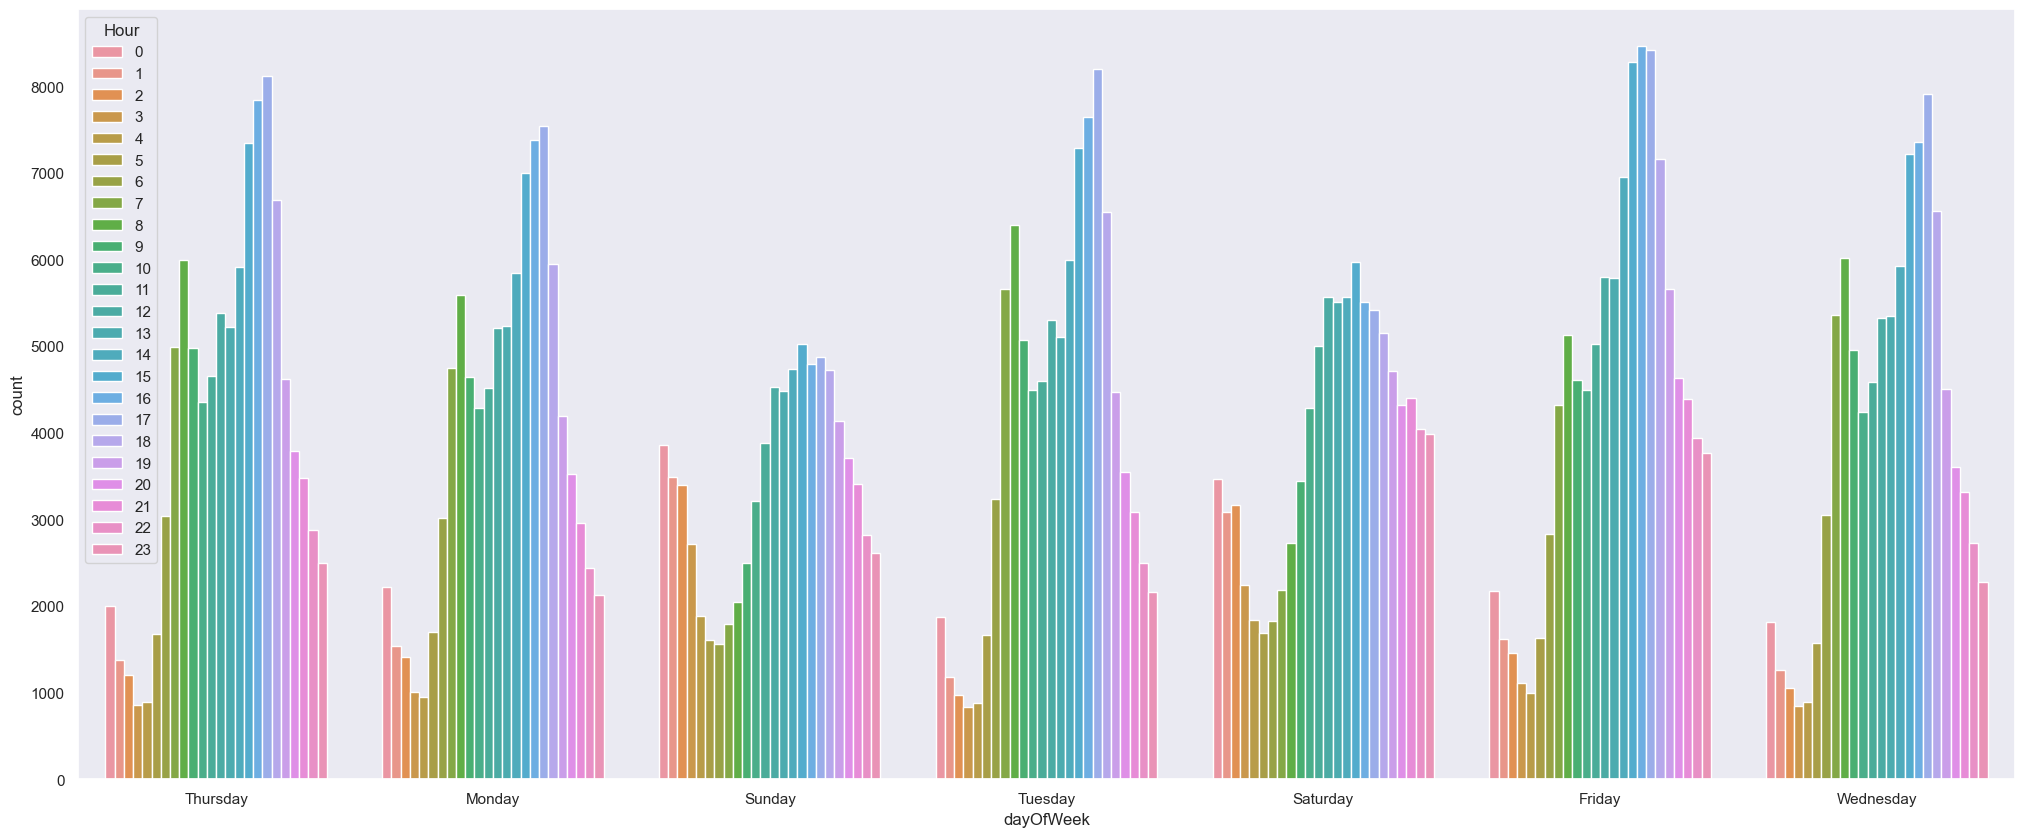

In [43]:
plt.figure(figsize = (25,10))
sns.set_theme(style="dark")
#Analyzing-crashes-on-any-time-of-day-when-there-is-high-no-accidents
ax = sns.countplot(x = 'dayOfWeek',hue = 'Hour',data = final_data)

<div class = "alert alert-info">From above plot we can see there are more accidents on 3-9 pm and in the morning in between 6-10 am. We can conclude it may be due to high traffic on office hours.
Sundays and saturday have the least accidents as in weekend there is low traffic.</div>

### Analyzing crashes on any month of year when there is high no accidents 

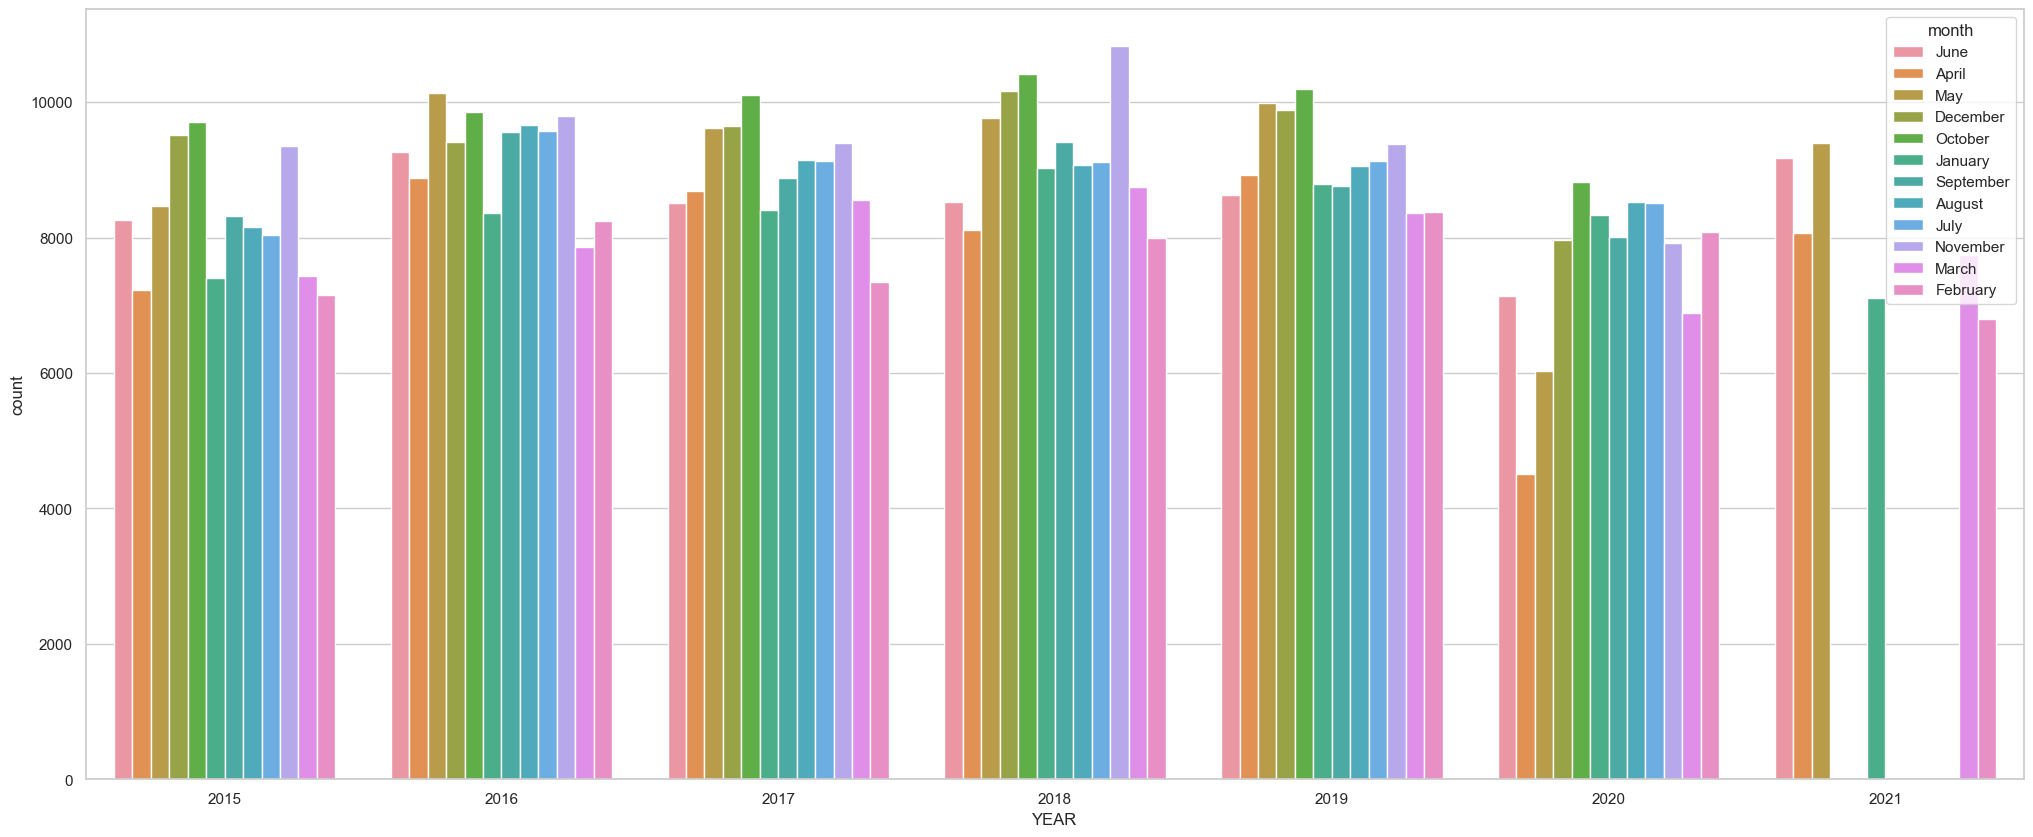

In [44]:
plt.figure(figsize = (25,10))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x = 'YEAR',hue = 'month',data = final_data)

<div class = "alert alert-info">Most accidents were recorded on first five month of year this may be due to ice,fog and cold.</div>

###  Crashes on different shift of day

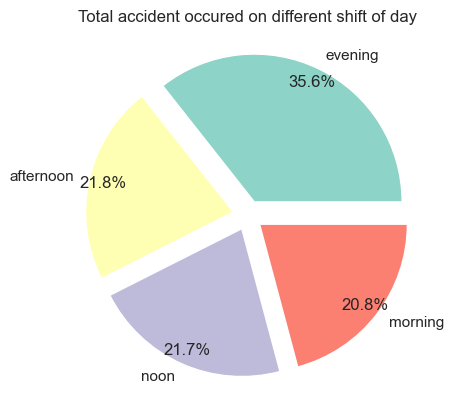

In [42]:

x = final_data['accident_shift'].value_counts().index
y =final_data['accident_shift'].value_counts().values
colors = sns.color_palette('Set3')
explode = [0.1, 0.1, 0.1, 0.1]
plt.pie(y,labels=x, pctdistance=0.9,autopct = '%1.1f%%', colors = colors, explode = explode)
plt.title("Total accident occured on different shift of day")
fig =  plt.gcf()
plt.show()

### Crashes occured on accordance to season of the year 

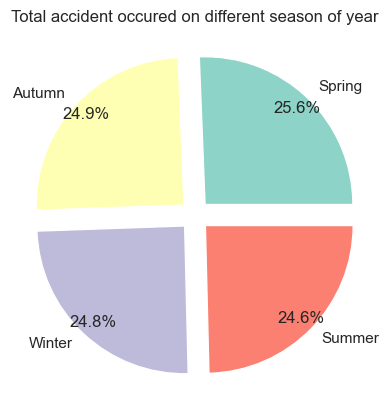

In [43]:

x = final_data['season_name'].value_counts().index
y =final_data['season_name'].value_counts().values
colors = sns.color_palette('Set3')
explode = [0.1, 0.1, 0.1, 0.1]
plt.pie(y,labels=x, pctdistance=0.9,autopct = '%1.1f%%', colors = colors, explode = explode)
plt.title("Total accident occured on different season of year")
fig =  plt.gcf()
plt.show()

### Lets examine the reasons for baltimore county having the maximum number of crashes. We will use the surface condition, road condition and divider description columns to get some insights. 

In [44]:
# selecting baltimore county as we have to find some insights from it 
baltimore_data = final_data[final_data.COUNTY_DESC == 'Baltimore']


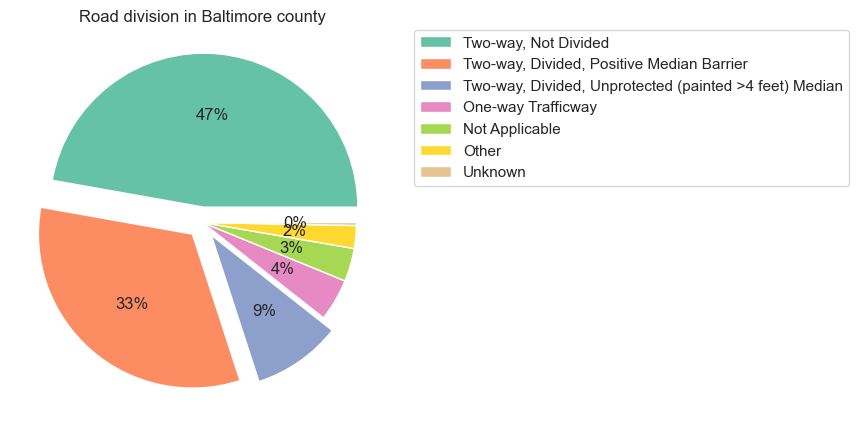

In [45]:
#plotting data of road division description on baltimore county
road_divider = baltimore_data.RD_DIV_DESC.value_counts()
legend = road_divider.index
fig, ax = plt.subplots(figsize = (5,5))
# plotting the graph 
colors = sns.color_palette('Set2')
explode = [0.1, 0.1, 0.1, 0, 0,0, 0]
plt.pie(road_divider.values,colors=colors,explode=explode,autopct='%.0f%%')
ax.legend(legend,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.title("Road division in Baltimore county")
plt.show() 

<div class ="alert alert-info">Here the road division in the category of Two- way not divided is more than others division. So, vehicles may have used the wrong path as there is no division in between</div>

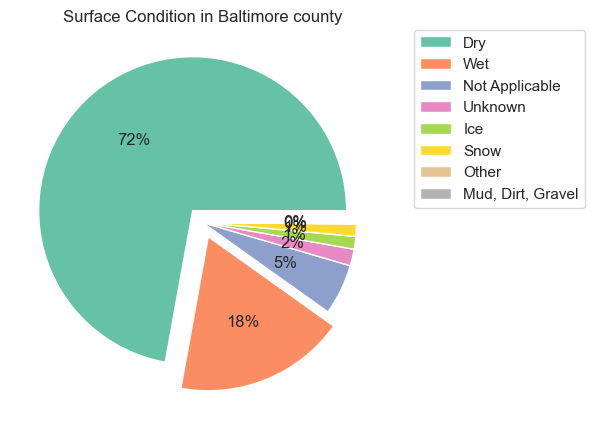

In [46]:
#Plotting crashes in accordance to surface condition
surface_condition = baltimore_data.SURF_COND_DESC.value_counts()
legend = surface_condition.index
fig, ax = plt.subplots(figsize = (5, 5))
colors = sns.color_palette('Set2')
explode = [0.1, 0.1, 0, 0, 0,0,0,0]
plt.pie(surface_condition.values,colors=colors,explode=explode,autopct='%.0f%%')
ax.legend(legend,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.title("Surface Condition in Baltimore county")

plt.show() 

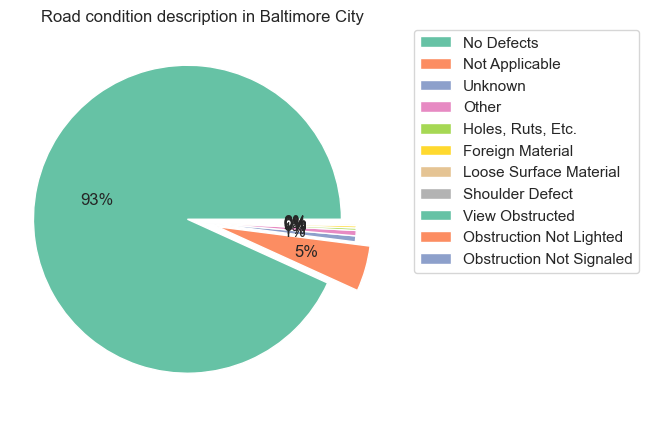

In [47]:
#Plotting crashes in accordance to road condition
road_condition = baltimore_data.RD_COND_DESC.value_counts()
legend = road_condition.index
fig, ax = plt.subplots(figsize = (5, 5))
explode = [0.1, 0.1, 0, 0, 0,0,0,0,0,0,0]
#define Seaborn color palette to use
colors = sns.color_palette('Set2')
plt.pie(road_condition.values, colors = colors, explode = explode, autopct='%.0f%%')
ax.legend(legend,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.title("Road condition description in Baltimore City")
plt.show();

<div class ='alert alert-info'> From above plottings we can say that In baltimore county many carshes are occured due to wet surface condition of the road and due to the two sided road not divided in between.</div>

### Injuries caused by accidents 

In [45]:
final_data['INJ_SEVER_DESC'].value_counts()

No Injury                         557934
Non-incapacitating Injury          60214
Possible Incapacitating Injury     48955
Incapacitating/Disabled Injury      8356
Fatal Injury                        1425
Name: INJ_SEVER_DESC, dtype: int64

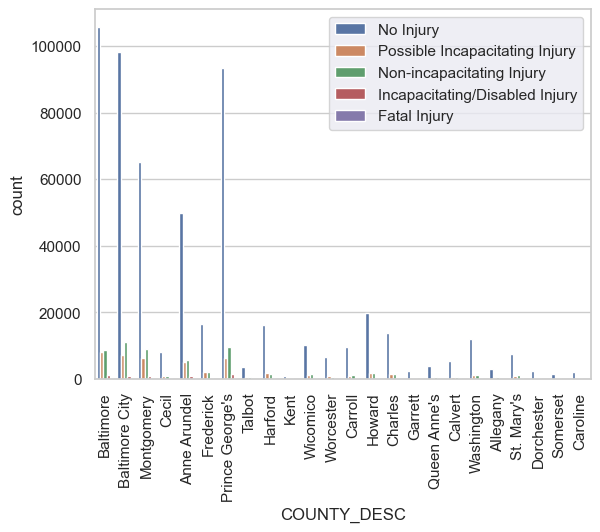

In [46]:
#severity of crashes on different county
severity_plot = sns.countplot(data = final_data, x = 'COUNTY_DESC', hue = 'INJ_SEVER_DESC')
sns.set(rc = {'figure.figsize':(40,20)})
severity_plot.set_xticklabels(severity_plot.get_xticklabels(),rotation = 90)
plt.legend(loc = 'upper right', frameon = True )
plt.show()

In [50]:
df = len(final_data[(final_data.COUNTY_DESC == 'Baltimore') & (final_data.INJ_SEVER_DESC == 'No Injury')])
print("Among the crashes occured in baltimore county",df,"had no injury")

Among the crashes occured in baltimore county 105772 had no injury


In [51]:
no_injury_removed = final_data[(final_data.INJ_SEVER_DESC != 'No Injury') & (final_data.INJ_SEVER_DESC != 'Non-incapacitating Injury')]

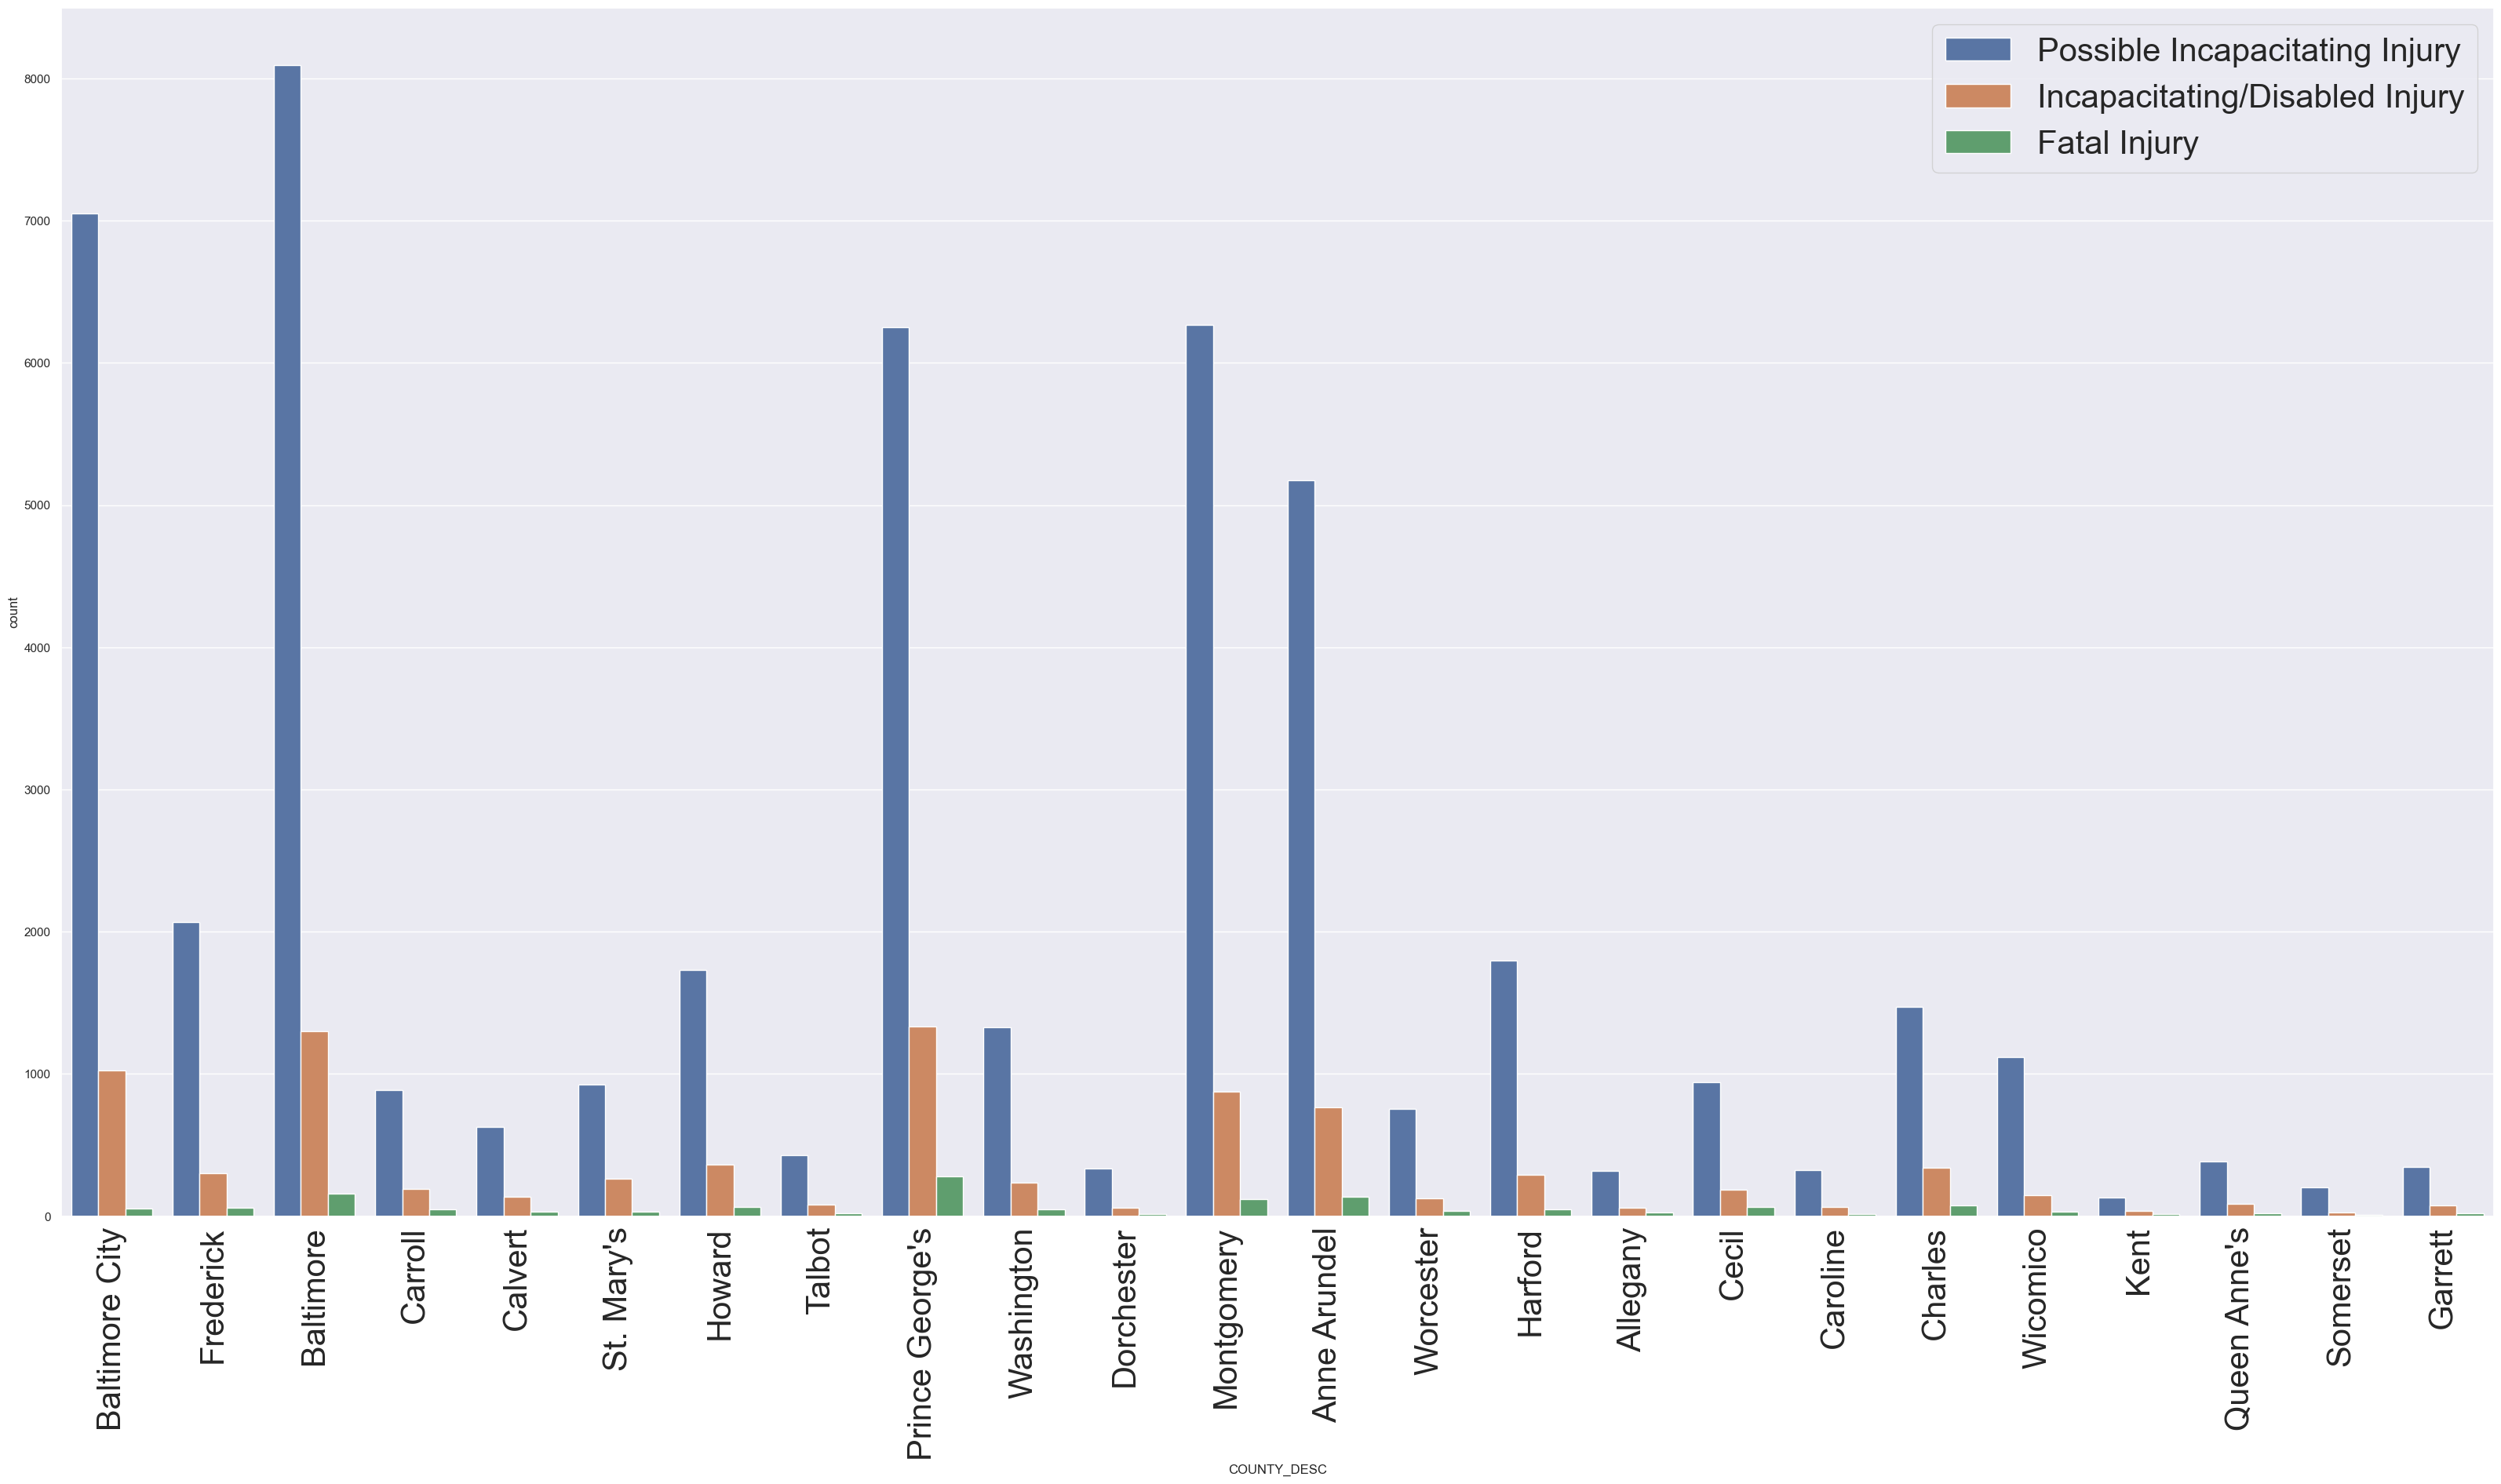

In [52]:
severity_plot_v2 = sns.countplot(data = no_injury_removed, x = 'COUNTY_DESC', hue = 'INJ_SEVER_DESC')
sns.set(rc = {'figure.figsize':(40,20)})
severity_plot_v2.set_xticklabels(severity_plot_v2.get_xticklabels(),rotation = 90, size = 30)
plt.legend(loc = 'upper right', frameon = True, fontsize = 30 )
plt.show()

### Analyzing  crashes based on weather description column.

In [53]:
final_crashes=final_data[(final_data.WEATHER_DESC != 'Not Applicable') \
                                  & (final_data.WEATHER_DESC != 'Unknown') \
                                  & (final_data.WEATHER_DESC != 'Other') \
                                  & (final_data.WEATHER_DESC != 'null')]

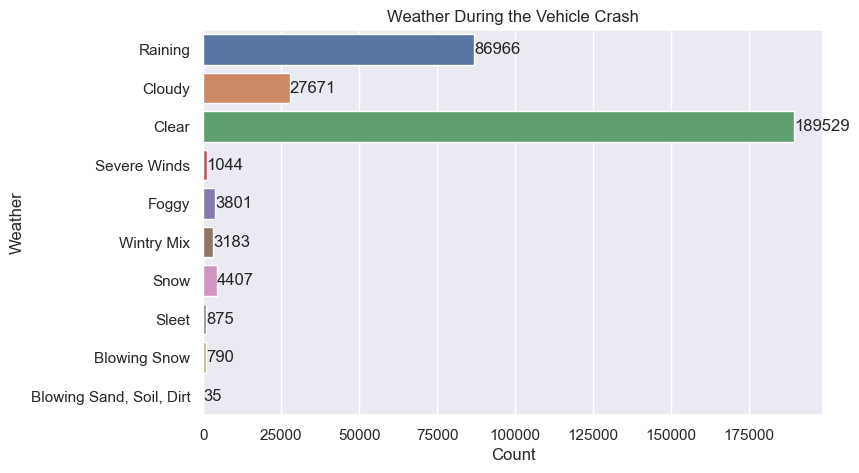

In [54]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y = final_crashes['WEATHER_DESC'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Weather During the Vehicle Crash')
plt.xlabel('Count')
plt.ylabel('Weather')
plt.show()

<div class = "alert alert-info">
    
    
In rainy days the count is more due to the roads are wet and there are high chances to get skid.</div>

### Plotting the top 10 vehicle types that were involved in accidents.

In [51]:
NoOfCrashes = final_data[(final_data.VEH_MAKE != 'CHEV') & (final_data.VEH_MAKE != 'CHEVY')]

In [52]:
NoOfCrashes=NoOfCrashes.groupby(['VEH_MAKE'])['accident_date'].count()
NoOfCrashes=NoOfCrashes.sort_values(ascending=False)

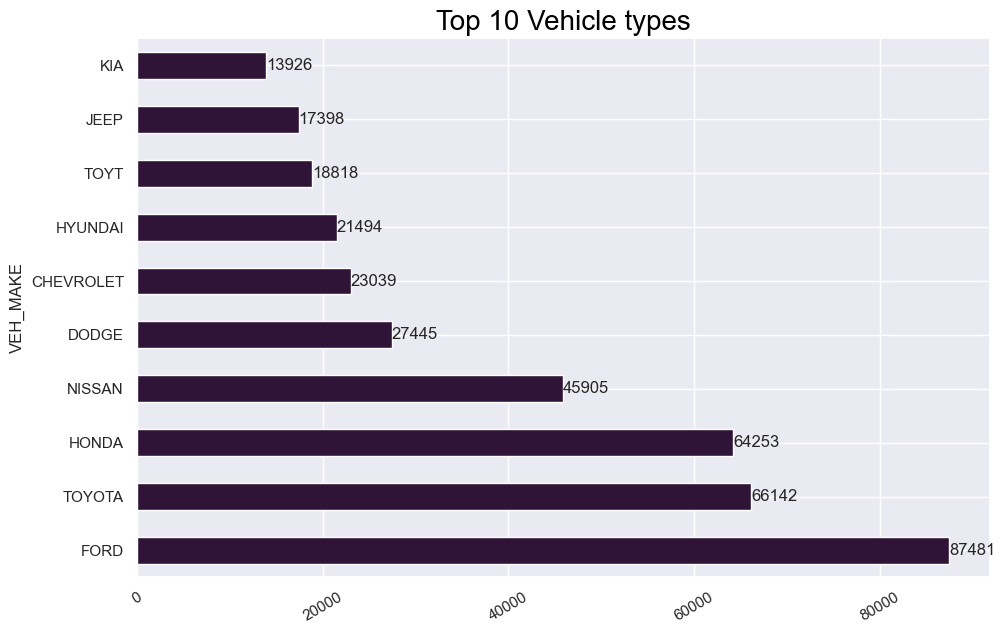

In [54]:
NoOfCrashes=NoOfCrashes.head(10)
plt.figure(figsize=(11,7))
ax = NoOfCrashes.plot(kind='barh', x='VEH_MAKE', y='count', colormap='twilight_shifted')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 10 Vehicle types", fontdict = {'fontsize': 20,  'color': '#000000'})
plt.xticks(rotation=30)
plt.show()

<div class = "alert alert-info">
    
- Ford is the type of vehicle most of the crashes happened</div>

### Bar plots of top 5 dates having higher no of accidents

In [57]:
#grouping by date as it contains no time only date
df_date= final_data.groupby('accident_date', as_index = False).size()
# sorting grouped values according to size
df_date = df_date.sort_values('size', ascending = False)
#calculating day according to date of occurence
df_date['accident_date'] = pd.to_datetime(df_date['accident_date'])
df_date['dayOfWeek'] = df_date['accident_date'].dt.dayofweek
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_date['dayOfWeek'] = df_date['dayOfWeek'].apply(lambda x: days[x])
#taking highest accident occurence
df_day_highest_accidents= df_date.head(5)
#df_day_highest_accidents

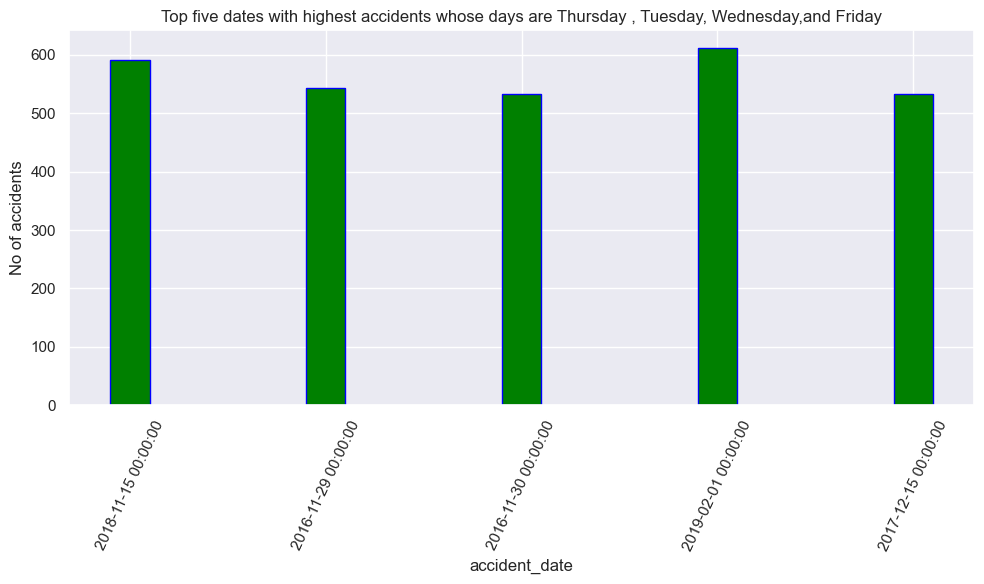

In [58]:
# plotting date and count
x = df_day_highest_accidents['accident_date'].to_list()
y = df_day_highest_accidents['size'].to_list()
days = df_day_highest_accidents['dayOfWeek'].to_list()

data = {key: val for key,val in zip(x, y)}
fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(len(y))])
ax.bar(idx, [val for key,val in sorted(data.items())], width=0.2,color='Green', edgecolor = "blue")
ax.set_xticks(idx)
ax.set_xticklabels(x, rotation=65)
ax.set_xlabel('accident_date')
ax.set_ylabel('No of accidents')
plt.title("Top five dates with highest accidents whose days are Thursday , Tuesday, Wednesday,and Friday")
fig.tight_layout()
plt.show()

<div class = "alert alert-info">
    From above plot we can conclude 2019-02-01 Thursday has the highest number of accidents recorded and likewise 
</div>

### Vehicle year and their crashes recorded

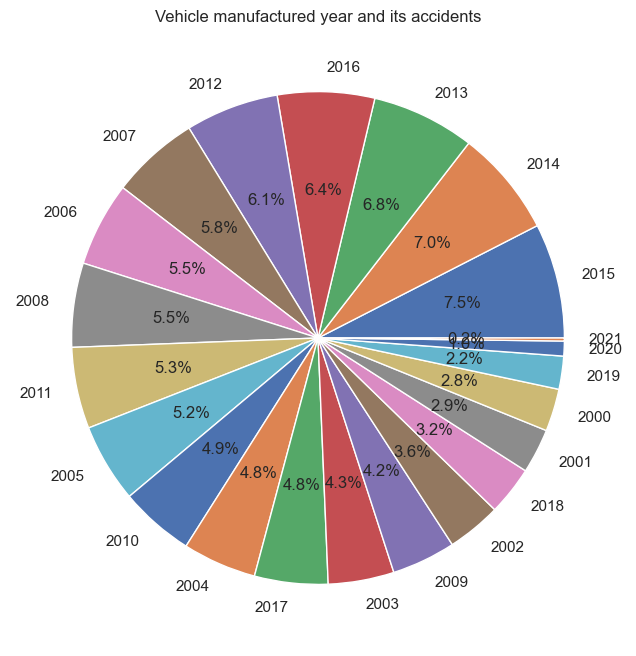

In [59]:
x = final_data["VEH_YEAR"].value_counts().index
y =final_data["VEH_YEAR"].value_counts().values
plt.pie(y,labels=x, autopct = '%1.1f%%')
plt.title("Vehicle manufactured year and its accidents")
fig =  plt.gcf()
fig.set_size_inches(8,8)
plt.show()

<div class = "alert alert-info">From above graph we can conclude vehicle manufactured in year 2015 have more crashes and 2021 have the least</div>

### Highest Accident recorded on main roads on different year 

In [60]:
final_data = final_data[
           (final_data["MAINROAD_NAME"] != "NO NAME")
       ]
df_mainroad_year = final_data.groupby(["YEAR","MAINROAD_NAME"]).size()
df_mainroad_year=df_mainroad_year.sort_values(ascending=False)

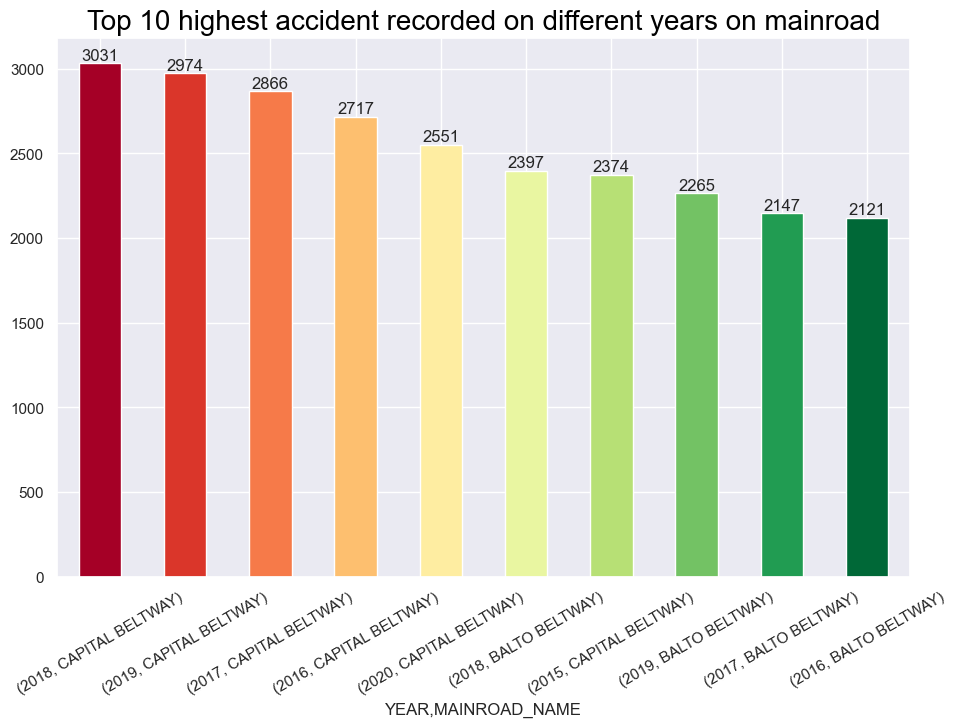

In [61]:
df_mainroad_year=df_mainroad_year.head(10)
plt.figure(figsize=(11,7))
colors = cm.RdYlGn(np.linspace(0,1,len(df_mainroad_year)))
ax = df_mainroad_year.plot(kind='bar', x='MAINROAD_NAME', y='count', color=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 10 highest accident recorded on different years on mainroad", fontdict = {'fontsize': 20,  'color': '#000000'})
plt.xticks(rotation=30)
plt.show()

<div class= "alert alert-info"> Capital beltway is the highest risk main road where mostly accidents are occured almost every year.</div>

### Calculating most accidents days on main roads

In [62]:
df_popular_accident_roads  = final_data[['MAINROAD_NAME','dayOfWeek']].value_counts().sort_values(ascending = False).reset_index(name = "total_accidents")

In [63]:
# calculating the rank from each day accident to each Main road
df_popular_accident_roads['rank'] = df_popular_accident_roads.groupby(['MAINROAD_NAME'])['total_accidents']\
                        .rank(method='max',ascending=False)
df_popular_accident_roads.sort_values(by=['total_accidents','MAINROAD_NAME'],ascending=False,inplace=True)
# based on the rank filtering rank 1 which shows frequently accident day for each main road and fetching the top 10
accident_days_of_roads = df_popular_accident_roads[df_popular_accident_roads['rank'] == 1.0].head(10)
top_10_road_name_dict = accident_days_of_roads.set_index('MAINROAD_NAME').to_dict()['dayOfWeek']
print("The Top 10 MAin roads and its frequently accidents days are \n",top_10_road_name_dict)

The Top 10 MAin roads and its frequently accidents days are 
 {'CAPITAL BELTWAY': 'Friday', 'BALTO BELTWAY': 'Wednesday', 'EISENHOWER MEMORIAL HWY': 'Wednesday', 'CRAIN HWY': 'Friday', 'J F K MEMORIAL HWY': 'Sunday', 'OCEAN GATEWAY': 'Friday', 'PULASKI HWY': 'Friday', 'BELAIR RD': 'Friday', 'LIBERTY RD': 'Friday', 'GOV RITCHIE HWY': 'Friday'}


In [64]:
top_10_roadname_id = [key for key, value in top_10_road_name_dict.items()]
# fetching the data for only top 10 Main roads
top_10_accident_day_df = df_popular_accident_roads[\
        df_popular_accident_roads['MAINROAD_NAME'].isin(top_10_roadname_id)\
        & df_popular_accident_roads['rank'].isin([1.0,2.0,3.0]) ]

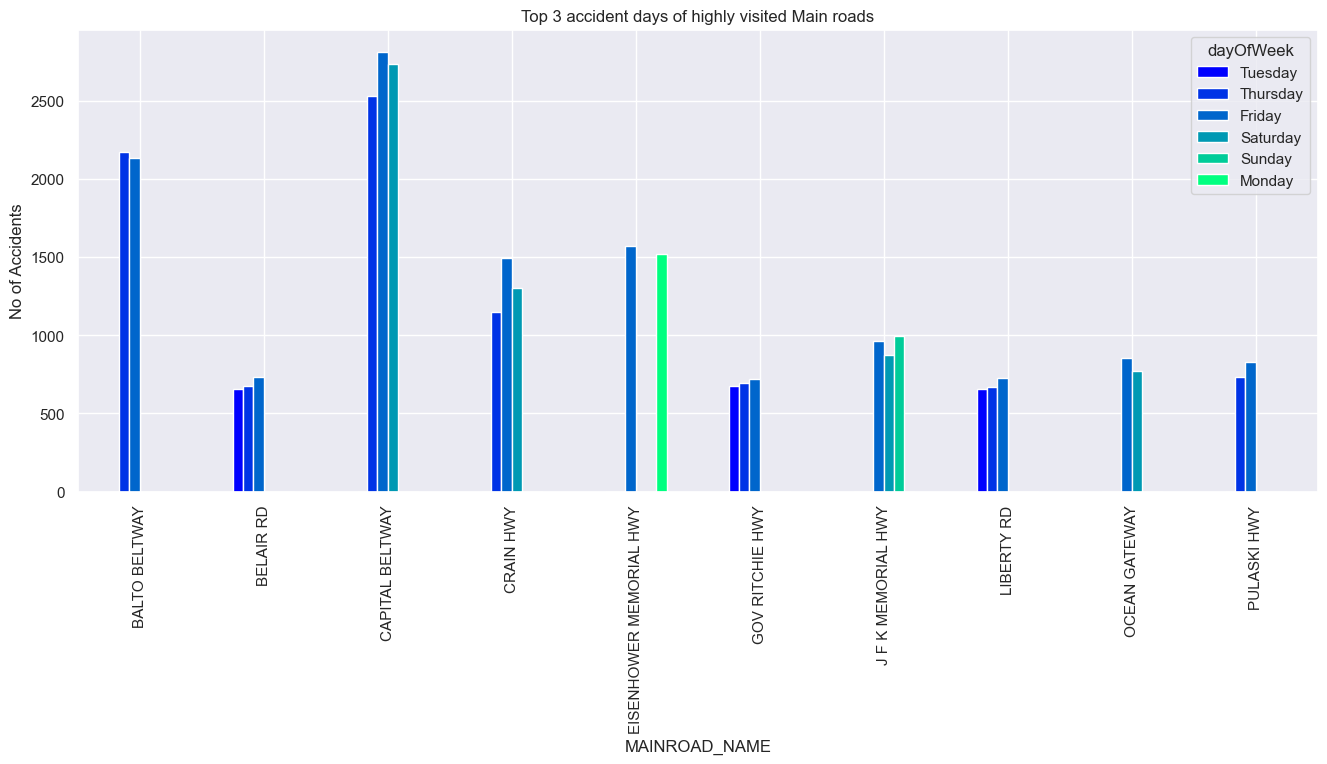

In [65]:
# transforming the data wide format to plot the comparative graph
# where each row is a Main road name  and columns are total no of accidents
df_plot = top_10_accident_day_df.pivot(index=["MAINROAD_NAME"], columns="dayOfWeek", values="total_accidents").reset_index()
df_plot.plot(x="MAINROAD_NAME", y=['Tuesday','Thursday','Friday','Saturday','Sunday','Monday'], kind="bar",figsize=(16,6),title = "Top 3 accident days of highly visited Main roads",colormap = 'winter')
plt.ylabel("No of Accidents")
plt.show()

<div class = "alert alert-info"> From above plot,

-Capital Beltway highway has the highest number of accidents and those were recorded on Thursday,Friday and Saturday and likewise.
</div>

### Determing the average age of the drivers who were involved in these accidents for each county

In [66]:
avg_age=final_data.groupby(['COUNTY_DESC'])['AGE'].mean()
avg_age = round(avg_age,2)

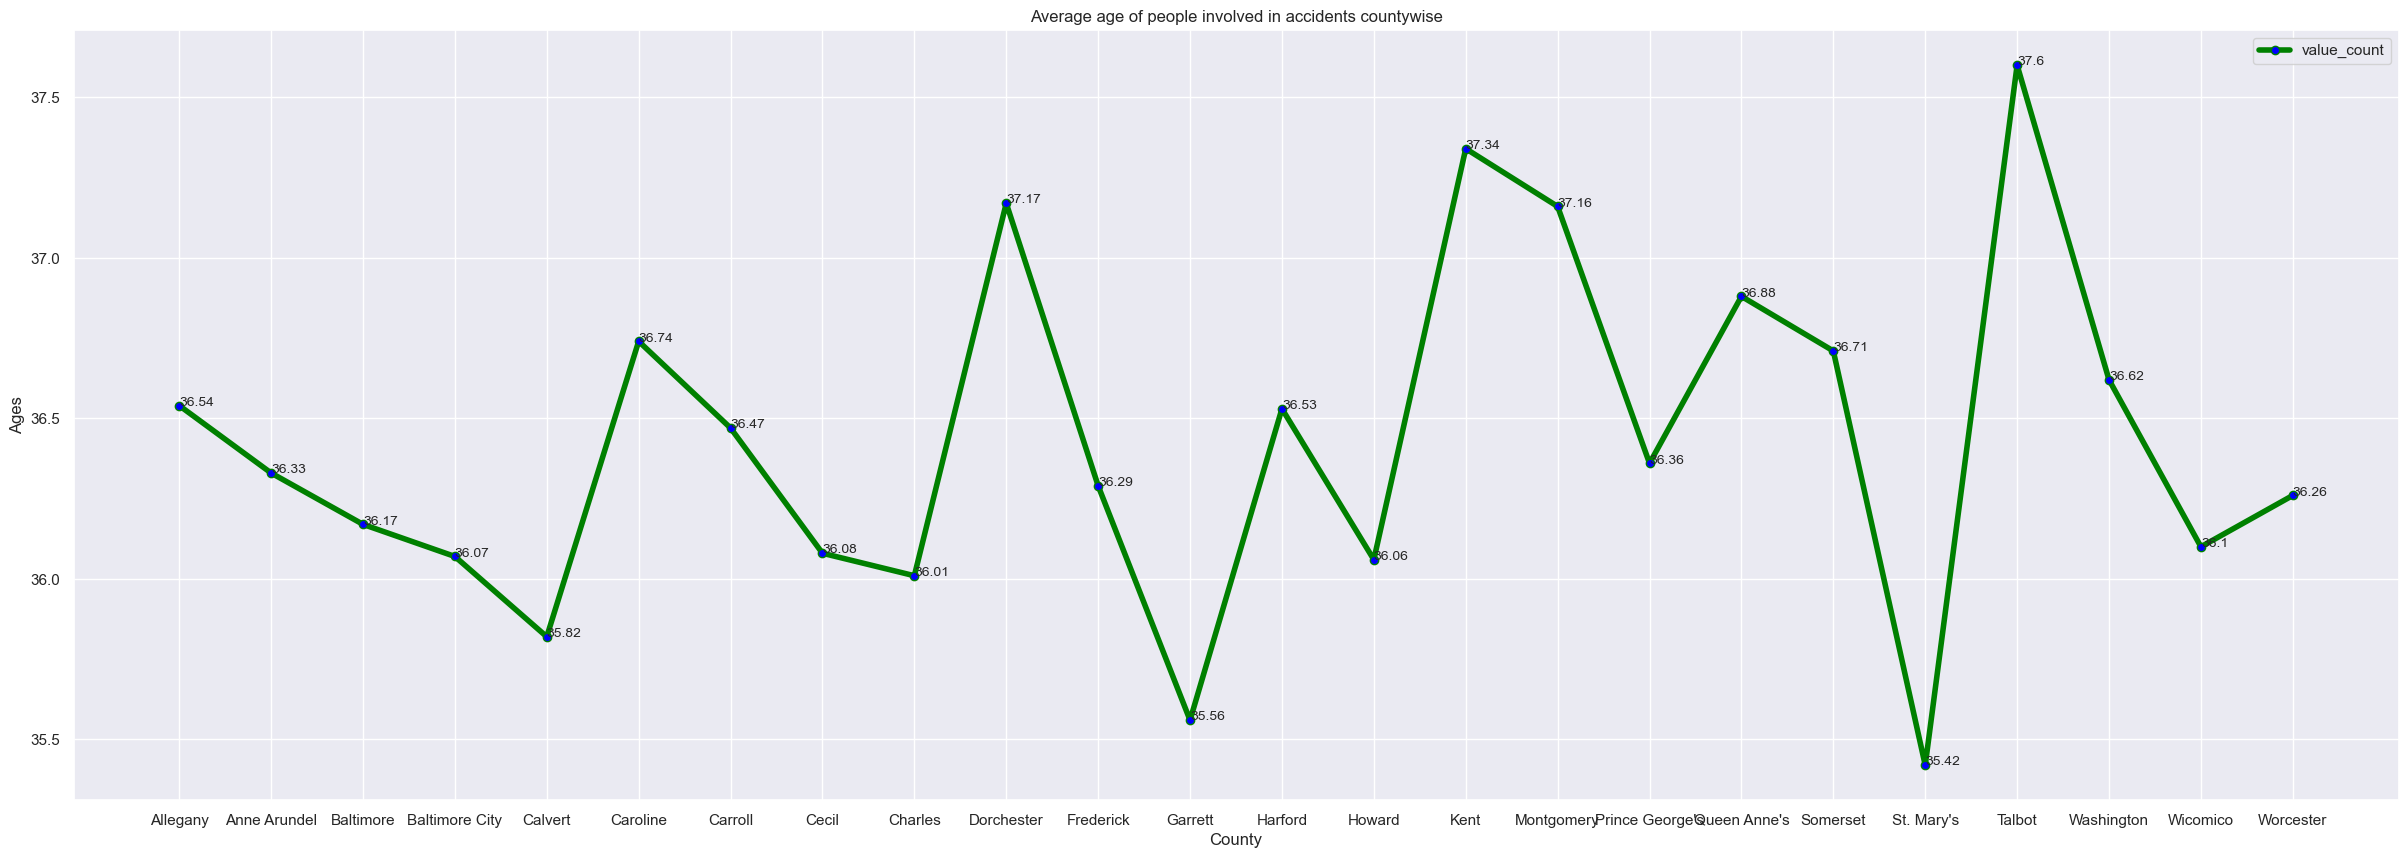

In [67]:
fig, ax = plt.subplots(figsize=(30,10))
average_ages = np.array(avg_age.index)
ages = np.array(avg_age)
# fetching data points for each marker point
for index in range(len(average_ages)):
    ax.text(average_ages[index], ages[index], ages[index], size=10)
    
plt.plot(average_ages,ages,marker='o', markerfacecolor='blue',markersize=6, color='green', linewidth=4,label="value_count")

plt.xlabel("County")
plt.ylabel("Ages")
plt.legend()
plt.title("Average age of people involved in accidents countywise")
plt.show();

### Crashes occured based on gender 

In [68]:
df_gender = final_data[(final_data.SEX_DESC != 'Nan')]
df_gender['SEX_DESC'].value_counts()

Male       343074
Female     238932
Unknown      6996
Name: SEX_DESC, dtype: int64

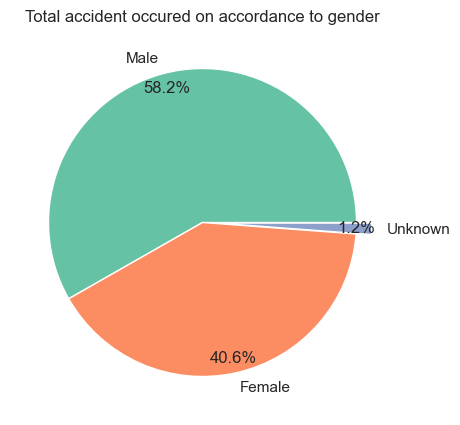

In [69]:

x = df_gender['SEX_DESC'].value_counts().index
y =df_gender['SEX_DESC'].value_counts().values
colors = sns.color_palette('Set2')
fig, ax = plt.subplots(figsize = (5, 5))
explode = [0, 0, 0.1]
plt.pie(y,labels=x, pctdistance=0.9,autopct = '%1.1f%%', colors = colors, explode = explode)
plt.title("Total accident occured on accordance to gender")
fig =  plt.gcf()
plt.show()

### Ploting data by year and month to get average  no of accidents per month 

In [70]:
df_boxplot = final_data.groupby(['YEAR','month'], as_index = False).size()
df_boxplot.rename(columns ={'size':'total_accidents'}, inplace = True)

<AxesSubplot:xlabel='month', ylabel='total_accidents'>

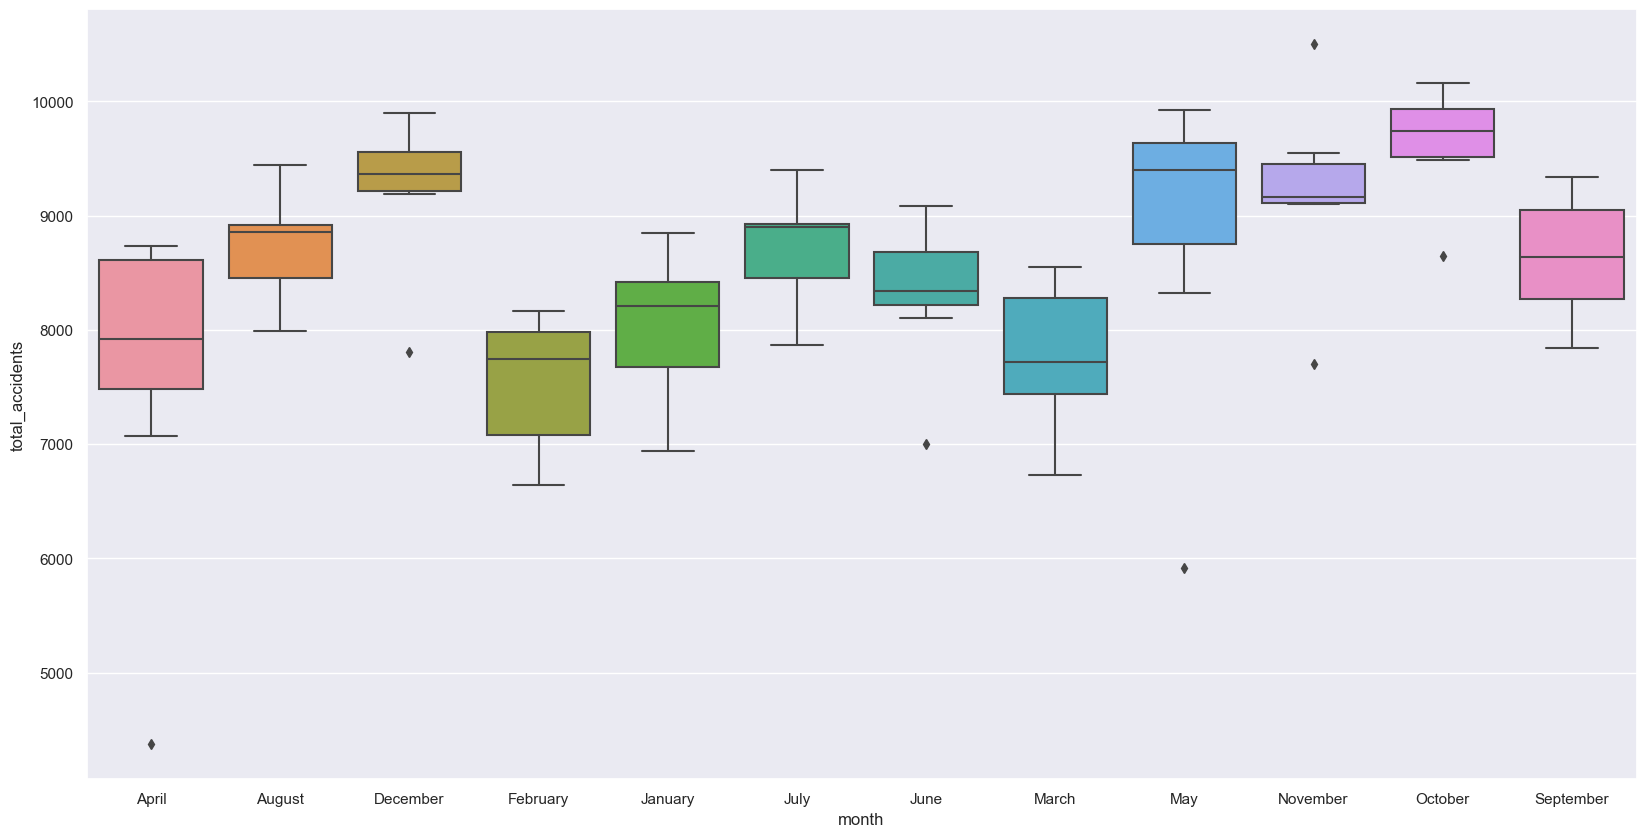

In [71]:
sns.set(style='whitegrid')
sns.set(rc={"figure.figsize":(20,10)})
sns.boxplot(x="month",
                y="total_accidents",
                data=df_boxplot)

### Applying Ztest on age and accidents occured and testing hypothesis


In [72]:
final_data['AGE'].describe()

count    661440.000000
mean         36.350944
std          13.402385
min          16.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          80.000000
Name: AGE, dtype: float64

In [73]:
#taking random 60 persons age as data from original dataframe
data = final_data['AGE'].head(60)
#from overall calculation of original data 
mu = 36.34
sigma = 13.40
#Testing hypothesis on accordance of 95% confidence interval
alpha = 0.05
null_mean = data.mean()
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis:The average age of people involved in accident is equals to 36. ")
else:
  print("Fail to Reject NUll Hypothesis: The average age of people involved in accident is greater than 36.")

mean=40.99 stdv=15.42
Fail to Reject NUll Hypothesis: The average age of people involved in accident is greater than 36.


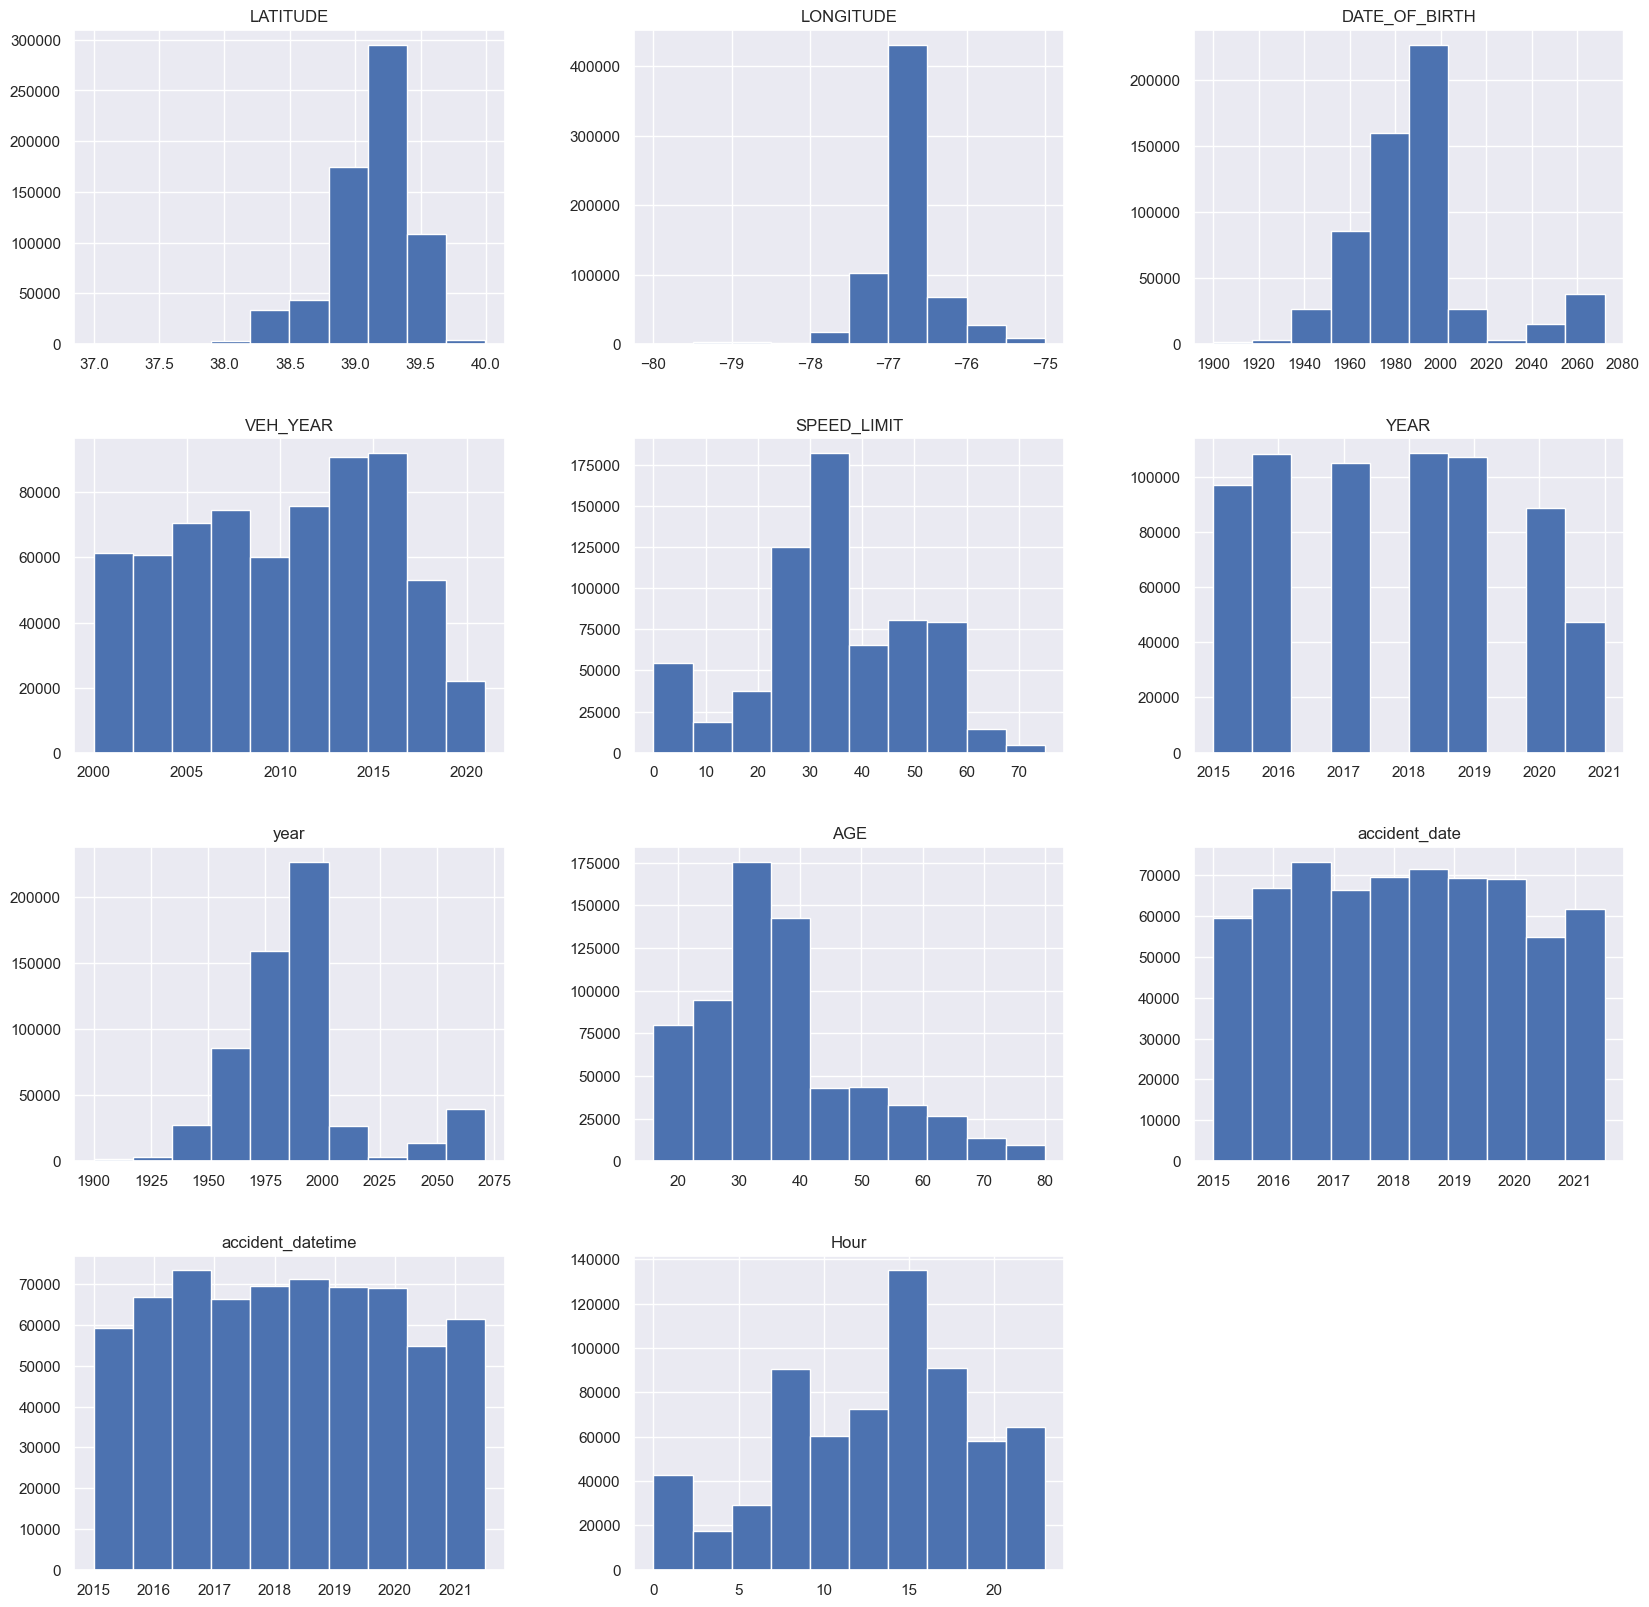

In [74]:
final_data.hist(figsize=(20,20))
plt.show()